In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry', 'fsi', 'gsi', 'mxi']]
blocks_gdf.head()

,geometry,fsi,gsi,mxi
id,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",0.054497,0.017345,0.700000
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",0.444238,0.217986,0.211541
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",0.003234,0.003205,0.700000
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",0.235746,0.056437,0.660753
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",0.086291,0.025381,0.692085


## Spacematrix morphotypes

Based on `mxi`, `fsi` and `l` values clustering

In [2]:
from blocksnet.analysis.morphotypes import get_spacematrix_morphotypes

blocks_df, clusters_df = get_spacematrix_morphotypes(blocks_gdf[['fsi', 'gsi', 'mxi']])

2025-03-26 20:38:03.318 | WARNING  | blocksnet.analysis.morphotypes.schemas:_before_validate:17 - Column l not found in columns. Calculating from fsi and gsi.


In [3]:
blocks_df

,l,fsi,mxi,cluster,morphotype
id,,,,,
0,3.141938,0.054497,0.700000,6.0,low-rise low-density residential
1,2.037925,0.444238,0.211541,8.0,low-rise low-density non-residential
2,1.008931,0.003234,0.700000,6.0,low-rise low-density residential
3,4.177121,0.235746,0.660753,1.0,mid-rise low-density residential
4,3.399812,0.086291,0.692085,6.0,low-rise low-density residential
...,...,...,...,...,...
16315,0.000000,0.000000,0.000000,NaN,NaN
16316,0.000000,0.000000,0.000000,NaN,NaN
16317,0.000000,0.000000,0.000000,NaN,NaN


Every block is labeled with `cluster` number and a `morphotype`

In [4]:
blocks_df.head()

,l,fsi,mxi,cluster,morphotype
id,,,,,
0,3.141938,0.054497,0.700000,6.0,low-rise low-density residential
1,2.037925,0.444238,0.211541,8.0,low-rise low-density non-residential
2,1.008931,0.003234,0.700000,6.0,low-rise low-density residential
3,4.177121,0.235746,0.660753,1.0,mid-rise low-density residential
4,3.399812,0.086291,0.692085,6.0,low-rise low-density residential


Clusters `DataFrame` describes median values of `l`, `fsi` and `mxi` for each cluster

In [5]:
clusters_df

,l,fsi,mxi,l_interpretation,fsi_interpretation,mxi_interpretation,morphotype
cluster,,,,,,,
0,1.000376,0.054494,0.000000,low-rise,low-density,non-residential,low-rise low-density non-residential
1,4.095736,0.662012,0.629427,mid-rise,low-density,residential,mid-rise low-density residential
2,3.701687,1.589960,0.139605,mid-rise,None,non-residential,mid-rise non-residential
3,11.617952,1.737004,0.599726,high-rise,None,residential,high-rise residential
4,1.190578,0.094238,0.414220,low-rise,low-density,mixed-use,low-rise low-density mixed-use
5,7.484532,1.141209,0.602240,high-mid-rise,None,residential,high-mid-rise residential
6,1.156065,0.082194,0.681958,low-rise,low-density,residential,low-rise low-density residential
7,4.262535,1.445619,0.473345,mid-rise,None,mixed-use,mid-rise mixed-use
8,2.468814,0.638834,0.000508,low-rise,low-density,non-residential,low-rise low-density non-residential


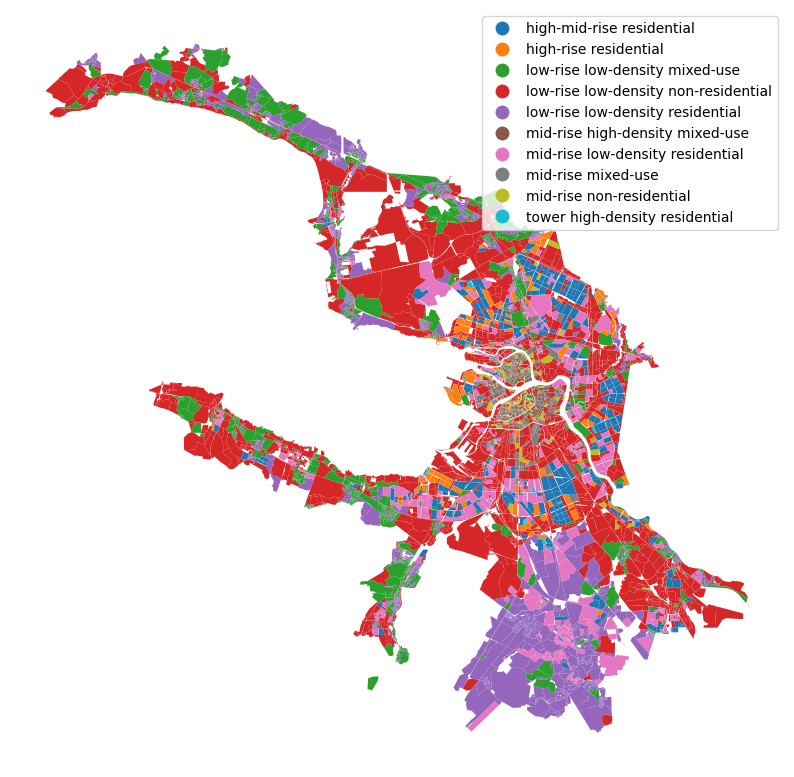

In [6]:
blocks_gdf[['geometry']].join(blocks_df[['morphotype']]).plot(column='morphotype', legend=True, figsize=(10,10)).set_axis_off()

## Strelka morphotypes

In [7]:
from blocksnet.analysis.morphotypes import get_strelka_morphotypes

blocks_df = get_strelka_morphotypes(blocks_gdf)

2025-03-26 20:38:05.012 | WARNING  | blocksnet.analysis.morphotypes.schemas:_before_validate:17 - Column l not found in columns. Calculating from fsi and gsi.


In [8]:
blocks_df.head()

,l,fsi,mxi,morphotype
id,,,,
0,3.141938,0.054497,0.700000,individual residential
1,2.037925,0.444238,0.211541,low-rise model
2,1.008931,0.003234,0.700000,individual residential
3,4.177121,0.235746,0.660753,mid-rise
4,3.399812,0.086291,0.692085,individual residential


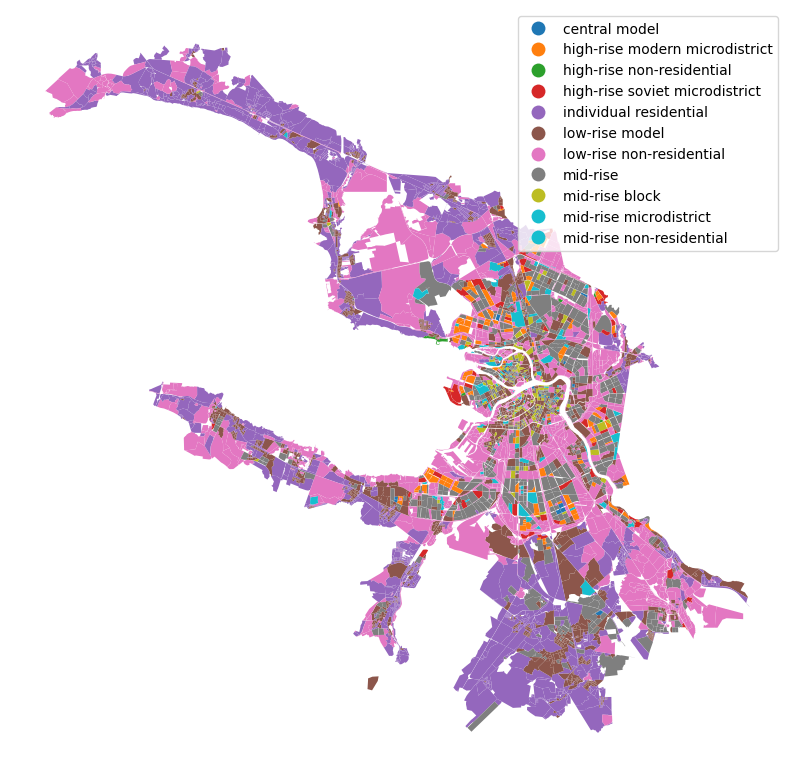

In [9]:
blocks_gdf[['geometry']].join(blocks_df[['morphotype']]).plot(column='morphotype', legend=True, figsize=(10,10)).set_axis_off()